In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airpalne","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[7]

'horse'

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

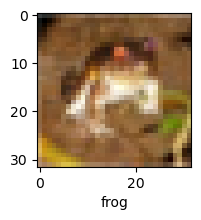

In [9]:
plot_sample(x_train,y_train,0)

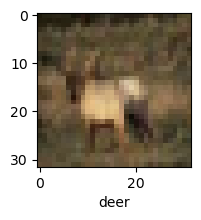

In [10]:
plot_sample(x_train,y_train,3)

In [11]:
x_train=x_train/255.0
x_test=x_test/255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=4)

Epoch 1/4
   1/1563 [..............................] - ETA: 4:40 - loss: 2.2817 - accuracy: 0.1875

2023-05-25 00:28:46.960608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 38s 24ms/step - loss: 1.8100 - accuracy: 0.3542
Epoch 2/4
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6224 - accuracy: 0.4267
Epoch 3/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5404 - accuracy: 0.4577
Epoch 4/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4831 - accuracy: 0.4779


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report :\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      1000
           1       0.68      0.41      0.51      1000
           2       0.42      0.18      0.25      1000
           3       0.33      0.29      0.31      1000
           4       0.53      0.21      0.30      1000
           5       0.37      0.38      0.37      1000
           6       0.41      0.69      0.51      1000
           7       0.72      0.31      0.43      1000
           8       0.39      0.83      0.53      1000
           9       0.44      0.62      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.42     10000
weighted avg       0.48      0.44      0.42     10000



In [14]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
        layers.MaxPooling2D(),
    #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])


In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.fit(x_train,y_train,epochs=8)

Epoch 1/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5361 - accuracy: 0.4534
Epoch 2/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2111 - accuracy: 0.5748
Epoch 3/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1028 - accuracy: 0.6147
Epoch 4/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0309 - accuracy: 0.6402
Epoch 5/8
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9764 - accuracy: 0.6610
Epoch 6/8
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9341 - accuracy: 0.6745
Epoch 7/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8995 - accuracy: 0.6863
Epoch 8/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8651 - accuracy: 0.6996


In [17]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0989 - accuracy: 0.6203


[1.098866581916809, 0.6202999949455261]

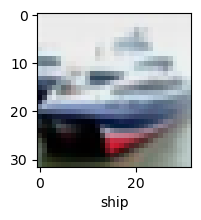

In [18]:
y_test=y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [19]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.4448593e-04, 9.5368698e-05, 1.0805685e-03, 7.8609776e-01,
        4.5701058e-04, 1.7542735e-01, 1.2369288e-02, 1.0092861e-03,
        2.1771122e-02, 1.1477788e-03],
       [6.1176610e-03, 2.5207955e-01, 2.3085606e-06, 1.4960990e-07,
        1.3414450e-07, 4.9295923e-09, 2.2644532e-08, 1.9662718e-09,
        7.4138719e-01, 4.1300946e-04],
       [6.5867150e-01, 4.3937631e-02, 3.8166051e-03, 1.5750480e-03,
        1.9036437e-04, 6.6212022e-05, 9.7800676e-06, 1.9475611e-04,
        2.8852376e-01, 3.0145107e-03],
       [4.6110478e-01, 4.5891065e-02, 4.5077685e-02, 1.4030054e-03,
        1.0700164e-03, 5.9171118e-05, 1.8107191e-03, 8.6742848e-06,
        4.4342893e-01, 1.4589957e-04],
       [4.3157984e-06, 4.3526420e-04, 3.2799356e-02, 1.5693215e-01,
        9.1318510e-02, 4.0344443e-02, 6.7798406e-01, 1.6753489e-05,
        1.4287587e-04, 2.2340702e-05]], dtype=float32)

In [22]:
y_classes=[np.argmax(element) for element in y_pred]

In [23]:
y_classes[:5]

[3, 8, 0, 0, 6]

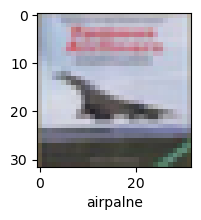

In [24]:
plot_sample(x_test,y_test,3)

In [25]:
classes[y_classes[3]]

'airpalne'

In [29]:
print("classification_report",classificaton_report(y_test,y_classes))

NameError: name 'classificaton_report' is not defined